<a href="https://colab.research.google.com/github/kumresh-soy/flutter-esp-controller/blob/master/perfect_training_source_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

To make this project i am using Below Requirement: 


1.   Necessary libary like Keras, tensorflow, numpy, etc.
2.   Jupyter notebook but i am using google coab for traing 
3.   TensorFlow is a free and open-source software library for machine learning. so it is easy to implement.

## **Importing necessary Libary**
In this project i am using Tensorflow and keras for machine `learning`

In [ ]:
try:
    %tensorflow_version 2.x
except:
    pass

In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals


import tensorflow as tf
import tensorflow_hub as hub
import os
from tensorflow.keras.layers import Dense, Flatten, Conv2D
from tensorflow.keras import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers


print("\u2022 Using TensorFlow Version:", tf.__version__)
print("\u2022 Using TensorFlow Hub Version: ", hub.__version__)
print('\u2022 GPU Device Found.' if tf.test.is_gpu_available() else '\u2022 GPU Device Not Found. Running on CPU')

• Using TensorFlow Version: 2.4.1
• Using TensorFlow Hub Version:  0.11.0
Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
• GPU Device Found.


At first we have to collect dataset for Traning.

here i am using `PlantVillage dataset` for  to recognize species and diseases in the crop leaves by using Convolutional Neural Network

We will download a public dataset of 54,305 images of diseased and healthy plant leaves collected under controlled conditions ( PlantVillage Dataset) also we have included some data on it ,sonow total images are 55,020 . The images cover 14 species of crops, including: apple, blueberry, cherry, grape, orange, peach, pepper, potato, raspberry, soy, squash, strawberry and tomato. It contains images of 17 basic diseases, 4 bacterial diseases, 2 diseases caused by mold (oomycete), 2 viral diseases and 1 disease caused by a mite. 12 crop species also have healthy leaf images that are not visibly affected by disease. Then store the downloaded zip file.

we'll need to make sure the input data is resized to 224x224 or 229x229 pixels as required by the networks.

Here we are loading data from gdrive and extract it.

In [ ]:
from zipfile import ZipFile
file_name = '/content/drive/MyDrive/PlantVillage.zip'
# 
with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print("done")

done


# Prepare training and validation dataset
Create the training and validation directories

In [ ]:
data_dir = os.path.join(os.path.dirname("/content/PlantVillage"), 'PlantVillage')
train_dir = os.path.join(data_dir, 'train')
validation_dir = os.path.join(data_dir, 'val')


Creating count method for counting total images in `val` and `train` dir.

```
# This is formatted as code
```



In [ ]:
import time
import os
from os.path import exists

def count(dir, counter=0):
    "returns number of files in dir and subdirs"
    for pack in os.walk(dir):
        for f in pack[2]:
            counter += 1
    return dir + " : " + str(counter) + "files"


Printing total no of images each folder have.

In [ ]:
print('total images for training :', count(train_dir))
print('total images for validation :', count(validation_dir))


total images for training : /content/PlantVillage/train : 44016files
total images for validation : /content/PlantVillage/val : 11004files


We allready created the class name for simplicity and put theat class list to the ***label.txt*** file

then to store classes name we use classes empty list to store the list of classess name.

In [ ]:
classes = []

with open("/content/drive/MyDrive/dataset/labels.txt") as file:
    for l in file:
        classes.append(l.strip())

print(classes)

['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Sp

We are use batch size to 28 bechause 28 is compleatly divisible by 44016. Here you think that why this no 44016. It is a total no of Train images.

you also thaik that what is batch size. The batch size defines the number of samples that will be propagated through the network.

In [ ]:
BATCH_SIZE = 28 #@param {type:"integer"}

Here we Intruduce the best and main part of the this projects is useing of **[Tranfer Learning](https://www.tensorflow.org/js/tutorials/transfer/what_is_transfer_learning)**. So one thing come in your mind that what is Tranfer Learning and how it will b usefull for this project and whts is benifit.

A `Transfer learning` is a technique that shortcuts much of this by taking a piece of a model that has already been `trained` on a related task and `reusing it in a new model.`

for more details go throw the like provided to the official link.

In [ ]:
module_selection = ("mobilenet_v2_100_224", 224, 1280) #@param ["(\"mobilenet_v2_100_224\", 224)", "(\"inception_v3\", 299)"] {type:"raw", allow-input: true}
handle_base, pixels, FV_SIZE = module_selection
MODULE_HANDLE ="https://tfhub.dev/google/imagenet/{}/feature_vector/4".format(handle_base)
IMAGE_SIZE = (pixels, pixels)
print("Using {} with input size {}, and dimension: {}".format(MODULE_HANDLE, IMAGE_SIZE, FV_SIZE))


Using https://tfhub.dev/google/imagenet/mobilenet_v2_100_224/feature_vector/4 with input size (224, 224), and dimension: 1280


# Load using keras.preprocessing

load these images from gdrive using the helpful `image_dataset_from_directory` utility. This will take you from a directory of images on disk to a tf.data.Dataset in just a couple lines of code. If you like, you can also write your own data loading code from scratch by visiting the [load images](https://www.tensorflow.org/tutorials/load_data/images) tutorial.

But we are using builtin method to perform this.

When you don't have a large image dataset, it's a good practice to artificially introduce sample diversity by applying random, yet realistic, transformations to the training images, such as rotation and horizontal flipping. This helps expose the model to different aspects of the training data and reduce overfitting.

but it is not work on Chaercter and Digit dataset.

In [ ]:
# Inputs are suitably resized for the selected module. Dataset augmentation (i.e., random distortions of an image each time it is read) improves training, esp. when fine-tuning.

validation_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_directory(
    validation_dir, 
    shuffle=False, 
    seed=42,
    color_mode="rgb", 
    class_mode="categorical",
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE)

do_data_augmentation = True #@param {type:"boolean"}
if do_data_augmentation:
  train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
      rescale = 1./255,
      rotation_range=40,
      horizontal_flip=True,
      width_shift_range=0.2, 
      height_shift_range=0.2,
      shear_range=0.2, 
      zoom_range=0.2,
      fill_mode='nearest' )
else:
  train_datagen = validation_datagen
  
train_generator = train_datagen.flow_from_directory(
    train_dir, 
    subset="training", 
    shuffle=True, 
    seed=42,
    color_mode="rgb", 
    class_mode="categorical",
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE)


Found 11004 images belonging to 39 classes.
Found 44016 images belonging to 39 classes.


# Fine-tuning a pre-trained model: 

To further improve performance, one might want to repurpose the top-level layers of the pre-trained models to the new dataset via fine-tuning. In this case, you tuned your weights such that your model learned high-level features specific to the dataset. This technique is usually recommended when the training dataset is large and very similar to the original dataset that the pre-trained model was trained on.

In [ ]:
do_fine_tuning = False #@param {type:"boolean"}

In [ ]:
print("Building model with", MODULE_HANDLE)

model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=IMAGE_SIZE + (3,)),
    hub.KerasLayer(MODULE_HANDLE, trainable=do_fine_tuning),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(train_generator.num_classes,
                          kernel_regularizer=tf.keras.regularizers.l2(0.0001))
])
model.build((None,)+IMAGE_SIZE+(3,))
model.summary()

Building model with https://tfhub.dev/google/imagenet/mobilenet_v2_100_224/feature_vector/4
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 1280)              2257984   
_________________________________________________________________
dropout (Dropout)            (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 39)                49959     
Total params: 2,307,943
Trainable params: 49,959
Non-trainable params: 2,257,984
_________________________________________________________________


# Compile the model

Compile the model before training it. Since there are two classes, use a binary `cross-entropy` loss with `from_logits=True` since the model provides a linear output.

In [ ]:
model.compile(
  optimizer=tf.keras.optimizers.SGD(lr=0.0001, momentum=0.9), 
  loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True, label_smoothing=0.1),
  metrics=['accuracy'])

# Continue training the model
If you trained to convergence earlier, this step will improve your accuracy by a few percentage points.

In [ ]:
steps_per_epoch = train_generator.samples // train_generator.batch_size
validation_steps = valid_generator.samples // valid_generator.batch_size

EPOCHS = 5 #@param {type:"integer"}

history = model.fit(
    train_generator,
    epochs=EPOCHS, steps_per_epoch=steps_per_epoch,
    validation_data=valid_generator,
    validation_steps=validation_steps)

Epoch 1/5
1572/1572 [==============================] - 523s 311ms/step - loss: 3.2237 - accuracy: 0.2393 - val_loss: 2.0867 - val_accuracy: 0.5751
Epoch 2/5
1572/1572 [==============================] - 484s 308ms/step - loss: 2.0768 - accuracy: 0.5664 - val_loss: 1.7192 - val_accuracy: 0.6918
Epoch 3/5
1572/1572 [==============================] - 485s 308ms/step - loss: 1.7578 - accuracy: 0.6708 - val_loss: 1.5448 - val_accuracy: 0.7555
Epoch 4/5
1572/1572 [==============================] - 486s 309ms/step - loss: 1.5879 - accuracy: 0.7311 - val_loss: 1.4438 - val_accuracy: 0.7935
Epoch 5/5
1572/1572 [==============================] - 485s 309ms/step - loss: 1.4984 - accuracy: 0.7624 - val_loss: 1.3750 - val_accuracy: 0.8191


In [ ]:
valid_generator.class_indices

# Graph 
Accuracy and loss

In [ ]:
import matplotlib.pylab as plt
import numpy as np

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.ylabel("Accuracy (training and validation)")
plt.xlabel("Training Steps")

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.ylabel("Loss (training and validation)")
plt.xlabel("Training Steps")
plt.show()

AttributeError: ignored

Createing load_image and prdict function

In [ ]:
# Import OpenCV
import cv2
import matplotlib.pylab as plt
# Utility
import itertools
import random
from collections import Counter
from glob import iglob


def load_image(filename):
    img = cv2.imread(os.path.join(data_dir, validation_dir, filename))
    img = cv2.resize(img, (IMAGE_SIZE[0], IMAGE_SIZE[1]) )
    img = img /255
    
    return img


def predict(image):
    probabilities = model.predict(np.asarray([img]))[0]
    class_idx = np.argmax(probabilities)
    
    return {classes[class_idx]: probabilities[class_idx]}

Printing and showing image with labels 

SOURCE: class: Tomato___Tomato_Yellow_Leaf_Curl_Virus, file: Tomato___Tomato_Yellow_Leaf_Curl_Virus/057552a8-8c38-443f-b523-5ee2b428e622___UF.GRC_YLCV_Lab 09477.JPG
PREDICTED: class: Tomato___Tomato_Yellow_Leaf_Curl_Virus, confidence: 6.034557


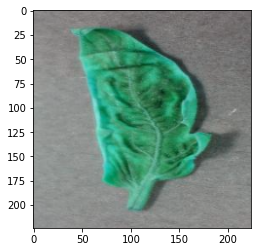

<Figure size 432x288 with 0 Axes>

SOURCE: class: Squash___Powdery_mildew, file: Squash___Powdery_mildew/0b9a9359-d35a-483d-a19f-656485060f26___MD_Powd.M 0871.JPG
PREDICTED: class: Tomato___Late_blight, confidence: 2.632225


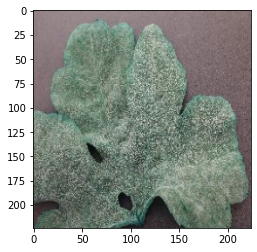

SOURCE: class: Tomato___Septoria_leaf_spot, file: Tomato___Septoria_leaf_spot/1b3e0904-291b-45b4-8823-44084b96808c___Matt.S_CG 6582.JPG
PREDICTED: class: Tomato___Septoria_leaf_spot, confidence: 3.408651


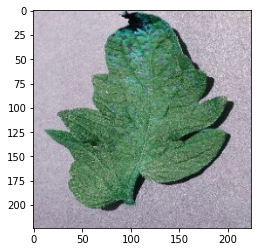

<Figure size 432x288 with 0 Axes>

SOURCE: class: Orange___Haunglongbing_(Citrus_greening), file: Orange___Haunglongbing_(Citrus_greening)/1b27485c-7618-44bc-a0a3-1de3337a768e___UF.Citrus_HLB_Lab 0506.JPG
PREDICTED: class: Orange___Haunglongbing_(Citrus_greening), confidence: 4.555709


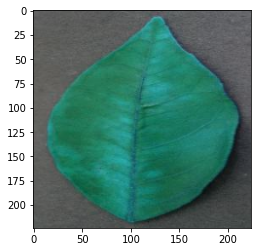

<Figure size 432x288 with 0 Axes>

SOURCE: class: Tomato___Early_blight, file: Tomato___Early_blight/248f220e-56ac-43f1-8f17-641ed4637138___RS_Erly.B 7802.JPG
PREDICTED: class: Tomato___Septoria_leaf_spot, confidence: 3.123494


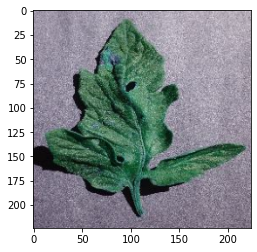

<Figure size 432x288 with 0 Axes>

In [ ]:
for idx, filename in enumerate(random.sample(valid_generator.filenames, 5)):
    print("SOURCE: class: %s, file: %s" % (os.path.split(filename)[0], filename))
    
    img = load_image(filename)
    prediction = predict(img)
    print("PREDICTED: class: %s, confidence: %f" % (list(prediction.keys())[0], list(prediction.values())[0]))
    plt.imshow(img)
    plt.figure(idx)    
    plt.show()

In [ ]:
import numpy as np
import cv2

img_file = '/content/PlantVillage/val/Apple___Black_rot/028d1f49-303d-46b6-ae2b-50862fab78ca___JR_FrgE.S 2748.JPG'

img = cv2.imread(img_file)
#resize image
img = cv2.resize(img, (224, 224) )
#rescale 
img = img /255

#predict imgage as a array
img_class = model.predict(np.asarray([img]))[0]
class_idx = np.argmax(img_class)
print(class_idx)
print(img_class[class_idx])

1
5.718037


# Optional: Deployment to TensorFlow Lite

[TensorFlow Lite](https://www.tensorflow.org/lite) lets you deploy TensorFlow models to mobile and IoT devices. The code below shows how to convert the trained model to TF Lite and apply post-training tools from the [TensorFlow Model Optimization Toolkit](https://www.tensorflow.org/model_optimization). Finally, it runs it in the TF Lite Interpreter to examine the resulting quality

  * Converting without optimization provides the same results as before (up to roundoff error).
  * Converting with optimization without any data quantizes the model weights to 8 bits, but inference still uses floating-point computation for the neural network activations. This reduces model size almost by a factor of 4 and improves CPU latency on mobile devices.
  * On top, computation of the neural network activations can be quantized to 8-bit integers as well if a small reference dataset is provided to calibrate the quantization range. On a mobile device, this accelerates inference further and makes it possible to run on accelerators like EdgeTPU.

In [ ]:
saved_model_path = "./saved_model"
tf.saved_model.save(model, saved_model_path)
converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_path)
tflite_model = converter.convert()
tflite_model_file = 'plantVilages.tflite'

with open(tflite_model_file, "wb") as f:
    f.write(tflite_model)